In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data_feature = pd.read_csv("./Dataset/train_feature.csv")
data_label = pd.read_csv("./Dataset/train_label.csv")
test_feature = pd.read_csv("./Dataset/test_feature.csv")

In [15]:
data_label.describe()

,label
count,10000.000000
mean,1.488900
std,1.116155
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


## 开始数据合并与预处理

In [16]:
data = pd.concat([data_feature,data_label],axis=1)

In [17]:
names = data.columns
cntnull = []
for i in range(len(names)):
    cntnull.append(data[names[i]].isnull().sum())
max(cntnull), min(cntnull), sum(cntnull)/len(cntnull)


(70, 0, 49.06611570247934)

In [18]:
# 测试一下全部删去空值的时候剩下什么
data0 = data.copy(deep=True).dropna()
data0

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0,0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0,0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0,0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0,2
6,56.0,4.256328,5838.357604,9.0,5.0,222.0,61.0,6.0,2.0,0.408384,...,0.758844,44.0,0.029199,11.567181,0.0,63.0,0.226799,2.0,43.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,50.0,6.267244,0.446096,11.0,2.0,186.0,47.0,9.0,8.0,0.586553,...,2.267124,44.0,0.132499,1.310972,2.0,63.0,0.039158,3.0,44.0,1
9995,67.0,1.279090,0.143929,10.0,3.0,210.0,51.0,8.0,1.0,0.670449,...,1.435415,50.0,0.607483,1.328274,4.0,49.0,0.707751,1.0,52.0,1
9996,56.0,4.814346,0.697155,6.0,6.0,267.0,44.0,9.0,2.0,0.580825,...,0.334893,63.0,0.237845,1.219853,1.0,55.0,0.555282,4.0,52.0,3
9997,57.0,-0.271178,0.579603,8.0,5.0,168.0,57.0,8.0,5.0,14.266668,...,1.366215,45.0,0.491556,1.428329,2.0,59.0,1.565160,2.0,41.0,0


清理了太多数据，考虑还是填充，用前一行的值填补空值

In [19]:
data = data.fillna(method='pad', axis=0)

In [20]:
data['feature_116'].describe()

count     10000.00000
mean       1526.86640
std       22861.25555
min          24.00000
25%          45.00000
50%          50.00000
75%          54.00000
max      632196.00000
Name: feature_116, dtype: float64

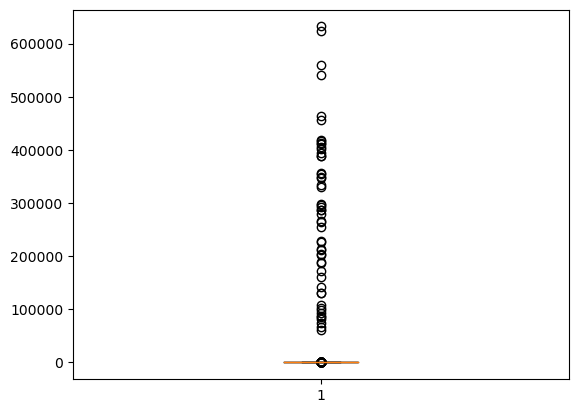

In [21]:
x = list(data['feature_116'].dropna())				#数据集
plt.boxplot(x)    				#垂直显示箱线图
plt.show()						#显示该图

In [22]:
(data['feature_116']>10000).describe(), (data['feature_116']>100).describe()

(count     10000
 unique        2
 top       False
 freq       9947
 Name: feature_116, dtype: object,
 count     10000
 unique        2
 top       False
 freq       9947
 Name: feature_116, dtype: object)

116属性里面有53个异常数据

In [23]:
(data['feature_119']>100).describe()

count     10000
unique        2
top       False
freq       9944
Name: feature_119, dtype: object

同理，119里面有56个，那合理怀疑前面的也有这种异常大的数据存在

In [24]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48.0,9.804220,0.064283,6.0,5.0,211.0,45.0,8.0,3.0,2.711200,...,1.157242,44.0,0.027881,1.122944,0.0,47.0,1.732584,2.0,52.0,0
1,45.0,-15.118262,0.590192,10.0,2.0,141.0,48.0,7.0,1.0,3.276093,...,0.583108,62.0,0.852767,4.685032,1.0,38.0,0.601408,2.0,44.0,0
2,56.0,1.691250,0.173249,8.0,1.0,251.0,47.0,6.0,1.0,1.082628,...,0.741096,62.0,0.907026,0.927391,2.0,53.0,2.129846,1.0,46.0,0
3,50.0,5.867626,0.004743,8.0,3.0,186.0,39.0,8.0,1.0,2.992557,...,1.173169,60.0,0.165119,7.096296,1.0,56.0,0.474665,2.0,38.0,2
4,49.0,-6.160454,0.709718,9.0,3.0,240.0,57.0,6.0,1.0,3.189316,...,1.068687,54.0,0.600518,4.988225,7.0,52.0,1.187483,2.0,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67.0,1.279090,0.143929,10.0,3.0,210.0,51.0,8.0,1.0,0.670449,...,1.435415,50.0,0.607483,1.328274,4.0,49.0,0.707751,1.0,52.0,1
9996,56.0,4.814346,0.697155,6.0,6.0,267.0,44.0,9.0,2.0,0.580825,...,0.334893,63.0,0.237845,1.219853,1.0,55.0,0.555282,4.0,52.0,3
9997,57.0,-0.271178,0.579603,8.0,5.0,168.0,57.0,8.0,5.0,14.266668,...,1.366215,45.0,0.491556,1.428329,2.0,59.0,1.565160,2.0,41.0,0
9998,52.0,-1.022212,0.839743,8.0,1.0,242.0,37.0,10.0,3.0,0.695831,...,0.561938,55.0,0.508272,3.113039,1.0,60192.0,0.727227,3.0,65.0,0


In [31]:
(data['feature_5']).describe()

count    1.000000e+04
mean     5.137623e+03
std      8.306486e+04
min      0.000000e+00
25%      1.620000e+02
50%      1.940000e+02
75%      2.220000e+02
max      2.072000e+06
Name: feature_5, dtype: float64

考虑对列数据的中位数确定分类方便处理异常值为边界值

In [38]:
datanames = names.drop('label')
list100 = []
for obj in datanames:
    if np.median(data[obj]) > 100:
        list100.append(0)
    elif np.median(data[obj]) <= 100 and np.median(data[obj]) > 10:
        list100.append(1)
    else:
        list100.append(2)
print(list100)

[1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]


感觉这么考虑可能有点欠妥当而且工作量有点大，考虑对连续数据进行映射处理

In [57]:
data['feature_0'].dtype

dtype('float64')

In [64]:
# 找整型列，由于数据将整型保存成float64而不是int64/32，故只能重新判断
def judgeint(data, colnames):
    # 如果超过95%的数据都是整数就认为是整数，并将数据处理成整数
    jud = []
    for obj in colnames:
        cnt = 0
        for i in data[obj]:
            if i.is_integer():
                cnt += 1
        if cnt/len(data[obj]) > 0.95:
            data[obj] = data[obj].astype(np.int64)
            jud.append(1)
        else:
            jud.append(0)
    return jud
    

In [65]:
list_isint = judgeint(data, datanames)
print(list_isint)

[1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]


In [74]:
# 对float的列进行预处理
data_float_names = data.select_dtypes(include=float).columns
data1 = data.copy(deep=True)
def sigmoid(X):
    if X >= 0:
        return 1.0 / (1 + np.exp(-X))
    else:   # 防止上溢
        return np.exp(X)/(np.exp(X)+1)
# 考虑到平均数由异常值的影响很大，掐头去尾取平均数和取中位数区别不大，取中位数来减
for obj in data_float_names:
    med = np.median(data1[obj])
    data1[obj] = data1[obj]-med
    for i in range(len(data1[obj])):
        data1[obj][i] = sigmoid(data1[obj][i])
    
data1

C:\Users\20123\AppData\Local\Temp\ipykernel_2444\2809947450.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[obj][i] = sigmoid(data1[obj][i])


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48,9.999481e-01,0.391603,6,5,211,45,8,3,0.495028,...,0.610459,44,0.381456,0.158529,0,47,0.736803,2,52,0
1,45,2.890462e-07,0.521319,10,2,141,48,7,1,0.632976,...,0.468818,62,0.584558,0.869083,1,38,0.474583,2,44,0
2,56,8.523097e-01,0.417848,8,1,251,47,6,1,0.161317,...,0.508274,62,0.597672,0.134148,2,53,0.806384,1,46,0
3,50,9.973465e-01,0.377512,8,3,186,39,8,1,0.564997,...,0.614240,60,0.414320,0.986668,1,56,0.443122,2,38,2
4,49,2.240370e-03,0.551035,9,3,240,57,6,1,0.612594,...,0.589207,54,0.522302,0.899896,7,52,0.618767,2,38,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67,7.926005e-01,0.410733,10,3,210,51,8,1,0.112982,...,0.674238,50,0.524039,0.187874,4,49,0.501146,1,52,1
9996,56,9.924297e-01,0.547925,6,6,267,44,9,2,0.104307,...,0.407791,63,0.432071,0.171888,1,55,0.463096,4,52,3
9997,57,4.477923e-01,0.518676,8,5,168,57,8,5,0.999990,...,0.658860,45,0.495076,0.203619,2,59,0.703077,2,41,0
9998,52,2.767523e-01,0.582946,8,1,242,37,10,3,0.115551,...,0.463550,55,0.499255,0.579539,1,60192,0.506015,3,65,0


In [82]:
# 接下来处理整型的部分
data2 = data1.copy(deep=True)
data_int_names = data.select_dtypes(include=int).columns.drop('label')

# 如果出现异常数据就用5%和95%的分位数取取边界值
for obj in data_int_names:
    # 肉眼观察最大值都大于0
    if (max(data2[obj])>=0 and np.percentile(data2[obj], 95)>=0) and max(data2[obj]) > np.percentile(data2[obj], 95)*100:
        data2[obj][data2[obj]>np.percentile(data2[obj], 95)] = np.percentile(data2[obj], 95)
    # 最小值分类处理
    if (min(data2[obj])>=0 and np.percentile(data2[obj], 5)>=0) and np.percentile(data2[obj], 5)-min(data2[obj]) > np.percentile(data2[obj], 95)/100:
        data2[obj][data2[obj]<np.percentile(data2[obj], 5)] = np.percentile(data2[obj], 5)
    if (min(data2[obj])<0 and np.percentile(data2[obj], 5)>=0) and np.percentile(data2[obj], 5)+min(data2[obj]) < min(data2[obj])/100:
        data2[obj][data2[obj]<np.percentile(data2[obj], 5)] = np.percentile(data2[obj], 5)
    if (min(data2[obj])<0 and np.percentile(data2[obj], 5)<0) and np.abs(np.percentile(data2[obj], 5)-min(data2[obj])) > np.abs(min(data2[obj])/100):
        data2[obj][data2[obj]<np.percentile(data2[obj], 5)] = np.percentile(data2[obj], 5)

C:\Users\20123\AppData\Local\Temp\ipykernel_2444\3499660496.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[obj][data2[obj]>np.percentile(data2[obj], 95)] = np.percentile(data2[obj], 95)
C:\Users\20123\AppData\Local\Temp\ipykernel_2444\3499660496.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[obj][data2[obj]<np.percentile(data2[obj], 5)] = np.percentile(data2[obj], 5)


In [83]:
data2

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,label
0,48,9.999481e-01,0.391603,6,5,211,45,8,3,0.495028,...,0.610459,44,0.381456,0.158529,0,47,0.736803,2,52,0
1,45,2.890462e-07,0.521319,10,2,141,48,7,1,0.632976,...,0.468818,62,0.584558,0.869083,1,39,0.474583,2,44,0
2,56,8.523097e-01,0.417848,8,1,249,47,6,1,0.161317,...,0.508274,62,0.597672,0.134148,2,53,0.806384,1,46,0
3,50,9.973465e-01,0.377512,8,3,186,39,8,1,0.564997,...,0.614240,60,0.414320,0.986668,1,56,0.443122,2,39,2
4,49,2.240370e-03,0.551035,9,3,240,57,6,1,0.612594,...,0.589207,54,0.522302,0.899896,5,52,0.618767,2,39,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,62,7.926005e-01,0.410733,10,3,210,51,8,1,0.112982,...,0.674238,50,0.524039,0.187874,4,49,0.501146,1,52,1
9996,56,9.924297e-01,0.547925,6,6,249,44,9,2,0.104307,...,0.407791,62,0.432071,0.171888,1,55,0.463096,4,52,3
9997,57,4.477923e-01,0.518676,8,5,168,57,8,5,0.999990,...,0.658860,45,0.495076,0.203619,2,59,0.703077,2,41,0
9998,52,2.767523e-01,0.582946,8,1,242,39,10,3,0.115551,...,0.463550,55,0.499255,0.579539,1,62,0.506015,3,62,0


In [86]:
(data2['feature_5']).describe()

count    10000.000000
mean       191.046800
std         37.124286
min        121.000000
25%        162.000000
50%        194.000000
75%        222.000000
max        249.000000
Name: feature_5, dtype: float64

看起来不错，预处理到这里就可以了

In [105]:
# 切分训练测试数据集
def split_train_test(data, test_ratio):
    np.random.seed(46)
    shuffled_indices = np.random.permutation(len(data))  # 生成和原数据等长的无序索引
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train,test = split_train_test(data2, 0.1)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [106]:
X_train,X_test = train[datanames],test[datanames]
y_train,y_test = train['label'],test['label']

### 多分类逻辑回归

In [181]:
import time
from tqdm import tqdm

class LogisticRegresion(object):
    def __init__(self,max_iter=1000,learning_rate=0.01):
        self.w = None
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        
    def softmax(self, a):
        # 处理一下溢出
        c = np.max(a)
        exp_a = np.exp(a-c)#溢出对策
        sum_exp_a = np.sum(exp_a)
        y = exp_a/sum_exp_a
        return y


    def fit(self,X,Y):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        self.n_classes = len(Y)
        W = np.zeros((np.size(X, 1), self.n_classes))
        t0 = time.time()
        # for _ in tqdm(range(self.max_iter), desc='Processing'):
        for _ in range(self.max_iter):
            W_prev = np.copy(W)
            Y_hat = self.softmax(X @ W)
            grad = X.T @ (Y_hat - Y)
            W -= self.learning_rate * grad
            if np.allclose(W, W_prev):
                t1 = time.time()
                print()
                break
            t1 = time.time()
        self.w = W
        print("一共用时："+str(t1-t0)+"s")

    def predict_prob(self,X):
        X = np.hstack([X,np.ones((X.shape[0],1))])
        pred_y = self.softmax(X @ self.w)
        return pred_y

    def predict(self,X):
        return np.argmax(self.predict_prob(X),axis=1)

In [182]:
model = LogisticRegresion(max_iter=10)
model.fit(np.array(X_train), np.array(y_train))


一共用时：144.49014043807983s


In [183]:
def acc(pred,test):
    cnt = 0
    for i in range(len(pred)):
        if pred[i] == test[i]:
            cnt += 1
    return cnt/len(pred)

In [184]:
pred = model.predict(X_test)
acc(pred, y_test)

0.249

### 决策树

In [157]:
# 节点
class Node(object):
    def __init__(self, feature_index=None, threshold=None, value=None, left_tree=None, right_tree=None):
        self.feature_index = feature_index  # 特征下标
        self.threshold = threshold          # 划分临界点
        self.value = value                  # 叶节点权重(只有叶节点有)
        self.left_tree = left_tree          # 左子树：小于临界值
        self.right_tree = right_tree        # 右子树：大于临界值


# 参数说明：最小划分样本数，最小划分增益，最大深度，gamma,lambda
class DecisionTree(object):
    def __init__(self, min_samples=5, min_split_gain=1e-7, max_depth=4, gamma=0, lam=1):
        self.min_samples = min_samples
        self.min_split_gain = min_split_gain
        self.max_depth = max_depth
        self.gamma = gamma
        self.lam = lam
        self.root = None

    def gradient(self, y, y_pre):
        "一阶导"
        return -2*(y - y_pre)

    def hess(self, y, y_pre):
        "二阶导"
        return 2*np.ones_like(y)

    def split(self, y):
        "传入回归树的 y 有2列，第一列为真实值，第二列为预测值"
        y_true = y[:,:1]
        y_pre = y[:,1:]
        return y_true, y_pre

    def obj(self, y, y_pre, gamma, lam):
        "节点得分"
        G = self.gradient(y, y_pre).sum()
        H = self.hess(y, y_pre).sum()
        return -0.5*(np.power(G,2)/(H+lam))+gamma

    def gain(self, y, y_left, y_right, gamma, lam):
        "收益"
        y, y_pre = self.split(y)
        y_left, y_left_pre = self.split(y_left)
        y_right, y_right_pre = self.split(y_right)
        obj_1 = self.obj(y, y_pre, gamma, lam)
        obj_1_left = self.obj(y_left, y_left_pre, gamma, lam)
        obj_1_right = self.obj(y_right, y_right_pre, gamma, lam)
        obj_2 = obj_1_left + obj_1_right
        return obj_1 - obj_2

    def leaf_value(self, y, lam):
        "计算叶节点权重"
        y, y_pre = self.split(y)
        G = self.gradient(y, y_pre).sum()
        H = self.hess(y, y_pre).sum()
        return -G/(H+lam)

    def divide(self, X, feature_index, threshold):
        "按某个特征的某个值划分为左右两部分,小的在左,大的在右"
        split = lambda sample: sample[feature_index] < threshold
        X_left = np.array([sample for sample in X if split(sample)])
        X_right = np.array([sample for sample in X if not split(sample)])
        return X_left, X_right

    def build_tree(self, X, y, current_depth=0):
        "构造决策树。注：这里的y是(m,2)维：第一列为真实值，第二列为预测值"
        #初始化最大收益、最好的划分及划分后的左右子树的样本集合
        largest_gain = 0
        # 将y合并到 X 的最后一列：方便左右子集划分
        Xy = np.concatenate((X, y), axis=1)
        # m, n 分别为X的行与列数
        m, n = np.shape(X)
        # 贪心算法求解划分的特征
        # 划分条件：
        # (1) 节点分配到的样本数大于阈值; 
        # (2) 当前深度不大于最大深度要求;
        # (3) 划分后的增益大于阈值
        if m > self.min_samples and current_depth < self.max_depth:
            # 遍历 X 中的特征
            for feature_index in range(n):
                # 抽出某个特征下标 feature，合并该特征的相同数据，并对其进行由小到大的排序
                sorted_feature_values = np.unique(X[:,feature_index])
                # 以特征下标 feature 所在列排序后的每个值为临界点将样本划分为左右两个集合；
                for each_value in sorted_feature_values:
                    # 左小，右大
                    Xy_left, Xy_right = self.divide(Xy, feature_index, each_value)
                    # 当左右集合均不为空时进行，否则 continue
                    if len(Xy_left) > 0 and len(Xy_right) > 0:
                        # 左右集合所对应的标签,计算收益
                        gain = self.gain(y, Xy_left[:,n:], Xy_right[:,n:], self.gamma, self.lam)
                        # 记录最大收益的信息
                        if gain > largest_gain:
                            largest_gain = gain
                            best_feature_index = feature_index
                            threshold = each_value
                            left = Xy_left
                            right = Xy_right
        # 划分后增益大于阈值则继续划分
        if largest_gain > self.min_split_gain:
            # 构造左右子树
            left_tree = self.build_tree(left[:,:n], left[:,n:], current_depth+1)
            right_tree = self.build_tree(right[:,:n], right[:,n:], current_depth+1)
            return Node(feature_index=best_feature_index, threshold=threshold, left_tree=left_tree, right_tree=right_tree)
        # 计算叶节点的权重
        leaf_value = self.leaf_value(y, self.lam)
        return Node(value=leaf_value)

    def fit(self, X, y):
        "开始构造树，根节点指向树根"
        self.root = self.build_tree(X, y)

    def predict_value(self, X, node=None):
        " X 是测试集的一行数据。此函数递归到叶节点，并返回叶节点的权重，作为预测值"
        if node is None:
            node = self.root
        # 若有节点值，则返回节点权重作为测试集的预测值
        if node.value is not None:
            return node.value
        # 与树的当前特征节点的临界值进行比较，小则进入左子树，大则进入右子树
        feature_value = X[node.feature_index]
        if feature_value < node.threshold:
            return self.predict_value(X, node.left_tree)
        else:
            return self.predict_value(X, node.right_tree)

    def predict(self, X):
        "对于测试集，逐行进行预测"
        y_pre = []
        for x in X:
            y_pre.append(self.predict_value(x))
        return np.array(y_pre).reshape(-1,1)



In [168]:
Tree = DecisionTree(max_depth=6)
Y_train = np.concatenate((np.mat(y_train),np.mat(np.ones_like(y_train))),axis=0).T
Tree.fit(np.array(X_train), np.array(Y_train))
# np.mat(X_train).shape, np.mat(y_train).shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 9000 and the array at index 1 has size 1

In [148]:
pred = Tree.predict(X_test)
# acc(np.array(pred), np.array(y_test))
pred

InvalidIndexError: (0, slice(None, None, None))

### 神经网络

In [185]:
from sklearn.neural_network import MLPClassifier as MPC

In [191]:
netmodel = MPC(solver='sgd', alpha=1e-5, activation='logistic',hidden_layer_sizes=(5, 2), max_iter=1000, tol=1e-7)
netmodel.fit(np.array(X_train), np.array(y_train))

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(5, 2),
              max_iter=1000, solver='sgd', tol=1e-07)

In [208]:
pred = netmodel.predict(np.array(X_test))
acc(np.array(pred), np.array(y_test))

0.255

### 支持向量机

In [202]:
import random

class SVMModel(object):
    """
    SVM model
    """
    def __init__(self, max_iter=1000, kernel_type='linear', C=1.0, epsilon=0.00001):
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.kernel_func_list = {
            'linear': self._kernel_linear,
            'quadratic': self._kernel_quadratic,
        }
        self.kernel_func = self.kernel_func_list[kernel_type]
        self.C = C
        self.epsilon = epsilon
        self.alpha = None

    def fit(self, X_train, Y_train):
        """
        Training model
        :param X_train: shape = num_train, dim_feature
        :param Y_train: shape = num_train, 1
        :return: loss_history
        """
        n, d = X_train.shape[0], X_train.shape[1]
        self.alpha = np.zeros(n)
        # Iteration
        for i in tqdm(range(self.max_iter), desc='Processing'):
            diff = self._iteration(X_train, Y_train)
            # if i % 100 == 0:
            #     print('Iter %r / %r, Diff %r' % (i, self.max_iter, diff))
            if diff < self.epsilon:
                break

    def predict_raw(self, X):
        return np.dot(self.w.T, X.T) + self.b

    def predict(self, X):
        return np.sign(np.dot(self.w.T, X.T) + self.b).astype(int)

    def _iteration(self, X_train, Y_train):
        alpha = self.alpha
        alpha_prev = np.copy(alpha)
        n = alpha.shape[0]
        for j in range(n):
            # Find i not equal to j randomly
            i = j
            for _ in range(1000):
                if i != j:
                    break
                i = random.randint(0, n - 1)
            x_i, x_j, y_i, y_j = X_train[i, :], X_train[j, :], Y_train[i], Y_train[j]
            # Define the similarity of instances. K11 + K22 - 2K12
            k_ij = self.kernel_func(x_i, x_i) + self.kernel_func(x_j, x_j) - 2 * self.kernel_func(x_i, x_j)
            if k_ij == 0:
                continue
            a_i, a_j = alpha[i], alpha[j]
            # Calculate the boundary of alpha
            L, H = self._cal_L_H(self.C, a_j, a_i, y_j, y_i)
            # Calculate model parameters
            self.w = np.dot(X_train.T, np.multiply(alpha, Y_train))
            self.b = np.mean(Y_train - np.dot(self.w.T, X_train.T))
            # Iterate alpha_j and alpha_i according to 'Delta W(a_j)'
            E_i = self.predict(x_i) - y_i
            E_j = self.predict(x_j) - y_j
            alpha[j] = a_j + (y_j * (E_i - E_j) * 1.0) / k_ij
            alpha[j] = min(H, max(L, alpha[j]))
            alpha[i] = a_i + y_i * y_j * (a_j - alpha[j])
        diff = np.linalg.norm(alpha - alpha_prev)
        return diff

    def _kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)

    def _kernel_quadratic(self, x1, x2):
        return np.dot(x1, x2.T) ** 2

    def _cal_L_H(self, C, a_j, a_i, y_j, y_i):
        if y_i != y_j:
            L = max(0, a_j - a_i)
            H = min(C, C - a_i + a_j)
        else:
            L = max(0, a_i + a_j - C)
            H = min(C, a_i + a_j)
        return L, H

In [210]:
from itertools import combinations
from utils import common

class MultiClassSVM:
    def __init__(self,C,kernel='linear',classes=None,tol=1e-3):
        self.C = C
        self.kernel = kernel

        self.classes = classes
        self.tol=tol
        self.svms = []
        self.class_num = len(classes) if classes is not None else 0



    def fit(self,X,y):
        '''
        :param X: N x d
        :param y: N
        :return:
        '''
        if self.classes is None:
            self.classes = np.sort(np.unique(y))
            self.class_num = len(self.classes)
        for i,specified in enumerate(combinations(self.classes,2)):
            print('SVM: %d %d' % specified)
            data,label = common.data_filter(X,y,specified)
            if self.kernel=='rbf':
                sigma = auto_scale(data)
                kernel = RBF_kernel(sigma)
            elif self.kernel=='linear':
                kernel = linear_kernel()
            else:
                raise NotImplemented()

            svm = SVMModel(self.C, kernel_type=self.kernel)
            svm.fit(data,label,tol=self.tol)
            self.svms.append(svm)



    def predict(self,X):
        '''
        :param X: N x d
        :return: N
        '''

        vote_res = []
        for svm in self.svms:
            vote_res.append(svm.predict(X).reshape((-1,1)))
        vote_res = np.concatenate(vote_res,axis=1).astype(np.int)
        pred = []
        for row in vote_res:
            pred.append(np.argmax(np.bincount(row)))
        pred = np.asarray(pred)
        return pred

ModuleNotFoundError: No module named 'utils'

In [203]:
# dim = X_train.shape
model1 = SVMModel(max_iter=10,kernel_type='quadratic') 
loss1 = model1.fit(np.array(X_train),np.array(y_train))

Processing:  10%|█         | 1/10 [00:10<01:35, 10.65s/it]

Iter 0 / 10, Diff 2.490433516678652e-05


Processing: 100%|██████████| 10/10 [01:57<00:00, 11.80s/it]


In [204]:
pred = model1.predict(np.array(X_test))
acc(pred, y_test)

0.129

### XGBoost

In [149]:
class XGBoost(object):
    """
    epoch: 最大子树棵树，迭代次数
    max_depth: 每颗子树的最大深度
    lr: 学习率
    Lambda: 二次正则化系数
    gamma: 叶结点个数正则化系数
    subsample: 样本比例
    colsample: 特征比例
    seed: 随机种子
    """

    def __init__(self, epoch=100, max_depth=6, learning_rate=0.3, gamma=0,
                 Lambda=1.0, subsample=1.0, colsample=1.0, seed=None):
        self.epoch = epoch
        self.max_depth = max_depth
        self.lr = learning_rate
        self.Lambda = Lambda
        self.gamma = gamma
        self.subsample = subsample
        self.colsample = colsample
        self.seed = seed

    def fit(self, X, y, eval_set=None, ESR=None):
        """
        对epoch棵树训练
        :param X: 训练集特征
        :param y: 训练集标签
        :param eval_set: 验证集，用于评估泛化能力、调参以及早停机制。
        :param ESR: Early stopping rounds，早停机制。当模型在验证集上的损失连续ESR次迭代都没有降低，则停止。
                    并把损失最低的一次迭代次数记为最佳迭代次数best_epoch。
        :return: self
        """
        self.err = {'train': [], 'val': []}
        self.best_epoch = self.epoch
        self.trees = []
        DecisionTree.set_data(X, y)

        if eval_set is not None:
            cur_val_y = np.zeros(eval_set[1].size)
            if ESR:
                min_val_loss = np.inf
                non_dec_rounds = 0

        # 学习第一棵树把先前输出当作0
        cur_y = np.zeros(y.size)
        # 开始学习
        for i in range(self.epoch):
            subtree = DecisionTree(self.max_depth, self.gamma, self.Lambda,
                                   self.colsample, self.subsample, self.seed, self.lr)
            # 根据前i-1棵子树的输出学习第i棵树
            subtree.fit(cur_y)
            self.trees.append(subtree)
            # 更新预测值
            cur_y += subtree.predict(X)
            # 更新损失
            self.__cal_MSE(y, cur_y, flag='train')
            # 早停机制
            if eval_set is not None:
                cur_val_y += subtree.predict(eval_set[0])
                val_loss = self.__cal_MSE(eval_set[1], cur_val_y, flag='val')
                if ESR:
                    if val_loss < min_val_loss:
                        min_val_loss = val_loss
                        non_dec_rounds = 0
                        self.best_epoch = i + 1
                    else:
                        non_dec_rounds += 1
                        if non_dec_rounds >= ESR:
                            break
        return self

    def predict(self, X):
        """
        输出预测结果
        :param X: 特征数组
        :return: 预测数组
        """
        pred = np.zeros(X.shape[0])
        for subtree in self.trees[:self.best_epoch] if self.best_epoch else self.trees:
            pred += subtree.predict(X)
        return pred

    def __cal_MSE(self, ytrue, ypred, flag='train'):
        """
        计算MSE
        :param ytrue: 真实标签
        :param ypred: 预测标签
        :param flag: 损失值
        :return:
        """
        loss = MSE(ytrue, ypred)
        self.err[flag].append(loss)
        return loss

    def loss_curve(self):
        plt.figure(figsize=(10, 6), dpi=80)
        plt.title('Learning curve with lr={}'.format(self.lr))
        plt.xlabel('epoch', fontsize=15)
        plt.ylabel('Mean Squared Error', fontsize=15)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.plot(np.arange(1, len(self.err['train']) + 1), self.err['train'], label='Training Error')
        if self.err['val']:
            plt.plot(np.arange(1, len(self.err['val']) + 1), self.err['val'], label='Validation Error')
        plt.legend(fontsize=15)
        plt.show()

In [151]:
boosting_tree = XGBoost(max_depth=6)
boosting_tree.fit(X_train,y_train)

InvalidIndexError: (array([5517, 1651, 4365, ..., 7581, 1720, 7367]), slice(None, None, None))

In [ ]:
Y_hat = boosting_tree.predict(X_test)